# Exercise: How many clusters of grain?

You are given a dataset of the measurements of samples of grain.  What's a good number of clusters in this case?

**Step 1:** Load the dataset.

In [56]:
import pandas as pd

seeds_df = pd.read_csv('seeds.csv')
del seeds_df['Unnamed: 0']

**Step 2:** Display the DataFrame to inspect the data.  Notice that there are 7 columns - so each grain sample (row) is a point in 7D space!  Scatter plots can't help us here.

In [58]:
seeds_df

area  perimeter  compactness  length  width  asymmetry_coefficient  \
0    15.26      14.84       0.8710   5.763  3.312                  2.221   
1    14.88      14.57       0.8811   5.554  3.333                  1.018   
2    14.29      14.09       0.9050   5.291  3.337                  2.699   
3    13.84      13.94       0.8955   5.324  3.379                  2.259   
4    16.14      14.99       0.9034   5.658  3.562                  1.355   
..     ...        ...          ...     ...    ...                    ...   
205  12.19      13.20       0.8783   5.137  2.981                  3.631   
206  11.23      12.88       0.8511   5.140  2.795                  4.325   
207  13.20      13.66       0.8883   5.236  3.232                  8.315   
208  11.84      13.21       0.8521   5.175  2.836                  3.598   
209  12.30      13.34       0.8684   5.243  2.974                  5.637   

     groove_length  
0            5.220  
1            4.956  
2            4.825  
3            4.805  
4            5.175  
..             ...  
205          4.870  
206          5.003  
207          5.056  
208          5.044  
209          5.063  

[210 rows x 7 columns]

**Step 3:** Extract the measurements from the DataFrame using its `.values` attribute:

In [59]:
seeds_df.values

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

**Step 4:**  _(Written for you)_. Measure the quality of clusterings with different numbers of clusters using the
inertia.  For each of the given values of `k`, perform the following steps:

  - Create a `KMeans` instance called `model` with `k` clusters.
  - Fit the model to the grain data `samples`.
  - Append the value of the `inertia_` attribute of `model` to the list `inertias`.

In [60]:
from sklearn.cluster import KMeans

In [61]:
clusters_range = range(2, 7)
inertias = [] 
for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(seeds_df)
    inertias.append(kmeans.inertia_)

**Step 5:**  Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

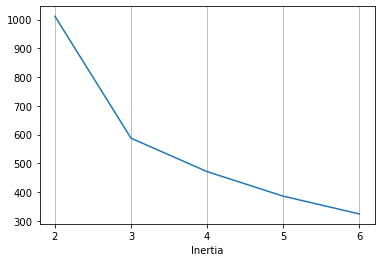

In [63]:
ax = sns.lineplot(x=clusters_range, y=inertias)
ax.set_xlabel('Clusters amount')
ax.set_xlabel('Inertia')
ax.set_xticks(clusters_range, minor=False)
plt.grid(True, axis='x')

In [64]:
# According to 'elbow rule', optimal amount of clusters is 3

You observed from the inertia a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". Cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.